# Process mining and causal discovery example

In [2]:
import sys
import os
# Get the current directory (where the notebook is located)
notebook_dir = os.getcwd()
# Get the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, os.pardir))
# Get two directories up
two_dirs_up = os.path.abspath(os.path.join(parent_dir, os.pardir))
# Add the project directory to the Python path
sys.path.append(two_dirs_up)

In [3]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [4]:
import sax
from sax.core.process_data.formatters.xes_formatter import XESFormatter
from sax.core.process_data.formatters.csv_formatter import CSVFormatter
from sax.core.utils.constants import Constants
from lingam.utils import make_dot
from sax.core.process_data.tabular_data import TabularEventData
from pm4py.objects.conversion.log import converter as log_converter
import sax.core.process_mining.process_mining as pm

In [5]:
#Import event log file and create event_log data object
fileName = "C:\Data\Automation\SAX\Data\collider expirementation\collider non-overlapping runs U[5,7], U[9,11]\simulated_run_non_overlapping_gen.csv"
event_log = pm.import_csv(eventlog=fileName,kloop_unroling=False,timestamp_format="%Y-%m-%d %H:%M:%S.%f")


In [6]:
# Get the parsed dataset from the event log object
event_log.getData()

,Id,Source,Type,Timestamp,Resource,Role,start:timestamp
0,2182,EVENT 1 START,assign,2023-02-24 12:02:25.523000+00:00,Owner2,Administrator,2023-02-24 12:02:25.523000+00:00
1,2182,EVENT 1 START,start,2023-02-24 12:02:25.523000+00:00,Owner2,Lawyer,2023-02-24 12:02:25.523000+00:00
2,2182,EVENT 1 START,complete,2023-02-24 12:02:25.523000+00:00,Owner1,Administrator,2023-02-24 12:02:25.523000+00:00
3,2182,Email,assign,2023-02-24 12:02:25.523000+00:00,Owner3,Lawyer,2023-02-24 12:02:25.523000+00:00
4,2182,Archive,assign,2023-02-24 12:02:25.523000+00:00,Owner1,Technician,2023-02-24 12:02:25.523000+00:00
...,...,...,...,...,...,...,...
149980,686,Close Application,start,2023-02-03 10:57:38.527000+00:00,Owner3,Administrator,2023-02-03 10:57:28.275000+00:00
149981,686,Close Application,complete,2023-02-03 10:57:44.397227+00:00,Owner3,Administrator,2023-02-03 10:57:28.275000+00:00
149982,686,EVENT 7 END,assign,2023-02-03 10:57:44.397227+00:00,Owner3,Lawyer,2023-02-03 10:57:28.275000+00:00
149983,686,EVENT 7 END,start,2023-02-03 10:57:44.397227+00:00,Owner3,Lawyer,2023-02-03 10:57:28.275000+00:00


In [7]:
# Fetch and print the mandatory properties and optional properties within the event log file
print('Mandatory Properties of the parsed event log: \n',event_log.getMandatoryProperties())
print('Optional properties of the parsed event log: \n',event_log.getOptionalProperties())


Mandatory Properties of the parsed event log: 
 {'case:concept:name': 'Id', 'concept:name': 'Source', 'time:timestamp': 'Timestamp', 'lifecycle:transition': 'Type', 'start:timestamp': 'start:timestamp'}
Optional properties of the parsed event log: 
 {'Resource': 'Resource', 'Role': 'Role'}


In [21]:

#Filter only the specified lifecycle events
filtered_log = event_log.filterLifecycleEvents(['start'])
filtered_log.getData()


,Id,Source,Type,Timestamp,Resource,Role,start:timestamp
1,2182,EVENT 1 START,start,2023-02-24 12:02:25.523000+00:00,Owner2,Lawyer,2023-02-24 12:02:25.523000+00:00
5,2182,Email,start,2023-02-24 12:02:25.523000+00:00,Owner2,Technician,2023-02-24 12:02:25.523000+00:00
6,2182,Archive,start,2023-02-24 12:02:25.523000+00:00,Owner2,Administrator,2023-02-24 12:02:25.523000+00:00
10,2182,Close Application,start,2023-02-24 12:02:36.506000+00:00,Owner3,Technician,2023-02-24 12:02:25.523000+00:00
13,2182,EVENT 7 END,start,2023-02-24 12:02:43.253164+00:00,Owner3,Technician,2023-02-24 12:02:25.523000+00:00
...,...,...,...,...,...,...,...
149971,686,EVENT 1 START,start,2023-02-03 10:57:28.275000+00:00,Owner1,Lawyer,2023-02-03 10:57:28.275000+00:00
149975,686,Email,start,2023-02-03 10:57:28.275000+00:00,Owner3,Technician,2023-02-03 10:57:28.275000+00:00
149976,686,Archive,start,2023-02-03 10:57:28.275000+00:00,Owner3,Technician,2023-02-03 10:57:28.275000+00:00
149980,686,Close Application,start,2023-02-03 10:57:38.527000+00:00,Owner3,Administrator,2023-02-03 10:57:28.275000+00:00


In [23]:
import pm4py
formatted_log = filtered_log.getLog()        
map =  pm4py.discover_heuristics_net(formatted_log)
pm.view_heuristics_net(map)


Exception: the specified case ID column is not contained in the dataframe. Available columns: ['Id', 'Resource', 'Role', 'Source', 'Timestamp', 'Type', 'start:timestamp']

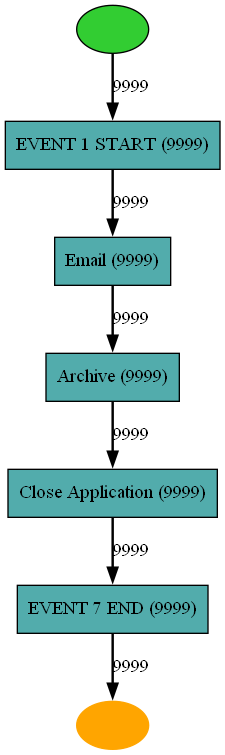

In [25]:
#Performm process mining 
import sax.core.process_mining.process_mining as pm
net = pm.discover_heuristics_net(event_log)
pm.view_heuristics_net(net)


In [26]:
#transform the RawEventData to tabular representation
transposed_df = event_log.transposeToTabular()
transposed_df.getData()

,Id,start:timestamp,Archive,Close Application,EVENT 1 START,EVENT 7 END,Email
0,0,2023-01-25 09:00:00+00:00,2023-01-25 09:00:10.743000+00:00,2023-01-25 09:00:17.152773+00:00,2023-01-25 09:00:00+00:00,2023-01-25 09:00:17.152773+00:00,2023-01-25 09:00:06.406000+00:00
1,1,2023-01-25 09:01:12.348000+00:00,2023-01-25 09:01:21.402000+00:00,2023-01-25 09:01:28.016404+00:00,2023-01-25 09:01:12.348000+00:00,2023-01-25 09:01:28.016404+00:00,2023-01-25 09:01:18.959000+00:00
2,10,2023-01-25 09:41:04.989000+00:00,2023-01-25 09:41:14.083000+00:00,2023-01-25 09:41:20.676132+00:00,2023-01-25 09:41:04.989000+00:00,2023-01-25 09:41:20.676132+00:00,2023-01-25 09:41:11.580000+00:00
3,100,2023-01-25 16:48:32.712000+00:00,2023-01-25 16:48:42.294000+00:00,2023-01-25 16:48:47.714735+00:00,2023-01-25 16:48:32.712000+00:00,2023-01-25 16:48:47.714735+00:00,2023-01-25 16:48:38.129000+00:00
4,1000,2023-02-08 12:01:59.993000+00:00,2023-02-08 12:02:10.483000+00:00,2023-02-08 12:02:16.848774+00:00,2023-02-08 12:01:59.993000+00:00,2023-02-08 12:02:16.848774+00:00,2023-02-08 12:02:06.355000+00:00
...,...,...,...,...,...,...,...
9994,9994,2023-06-19 12:25:33.362000+00:00,2023-06-19 12:25:43.787000+00:00,2023-06-19 12:25:50.615538+00:00,2023-06-19 12:25:33.362000+00:00,2023-06-19 12:25:50.615538+00:00,2023-06-19 12:25:40.188000+00:00
9995,9995,2023-06-19 12:25:55.764000+00:00,2023-06-19 12:26:05.662000+00:00,2023-06-19 12:26:11.965755+00:00,2023-06-19 12:25:55.764000+00:00,2023-06-19 12:26:11.965755+00:00,2023-06-19 12:26:02.064000+00:00
9996,9996,2023-06-19 12:27:15.155000+00:00,2023-06-19 12:27:25.548000+00:00,2023-06-19 12:27:31.124483+00:00,2023-06-19 12:27:15.155000+00:00,2023-06-19 12:27:31.124483+00:00,2023-06-19 12:27:20.729000+00:00
9997,9997,2023-06-19 12:30:28.224000+00:00,2023-06-19 12:30:38.557000+00:00,2023-06-19 12:30:44.296887+00:00,2023-06-19 12:30:28.224000+00:00,2023-06-19 12:30:44.296887+00:00,2023-06-19 12:30:33.960000+00:00


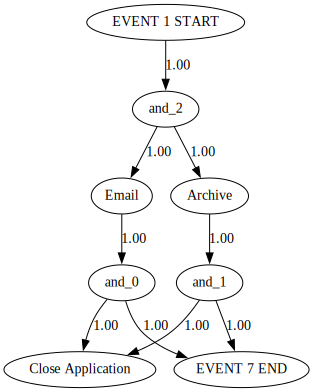

In [28]:
#Perform causal discovery
import sax.core.causal_process_discovery.causal_discovery as cd
result = cd.discover_causal_dependencies(event_log)
cd.view_causal_dependencies(result)
